# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [124]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

Para calcular el tiempo que le toma a una estrella cubrir la distancia de 0.5 grados, con un movimiento propio de 1 mas/yr, se utiliza la ecuación simplificada de velocidad:

(1) $$ v = \frac{d}{t} $$ \
donde *v* es velocidad en mas/yr, *d* distancia en mas y *t* tiempo en años.

Se despeja el tiempo y queda:

(2) $$ t = \frac{d}{v} $$

In [125]:
# Haga el cálculo aquí
# datos
d_rec = 1.8 * 10**6 # 0.5 grados en mas
v = 1 # mas/yr
t = d_rec/v
print('Tarda un tiempo ' + str(t) + 'años')


Tarda un tiempo 1800000.0años


### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [127]:
path_archivo = '/content/drive/MyDrive/FCFM - Universidad de Chile/Módulo Astro y ciencia de datos/ngc5694_pm.csv'
data = pd.read_csv(path_archivo)

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [128]:
# Muestra las columnas aquí
columnas = data.columns
columnas

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [129]:
# Muestra el DataFrame aquí
show_data = data
show_data

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [130]:
# Se seleccionan los datos de las columnas
# pmra y pmdec
# y se guardan en las variables:
pmra = data['pmra']
pmdec = data['pmdec']

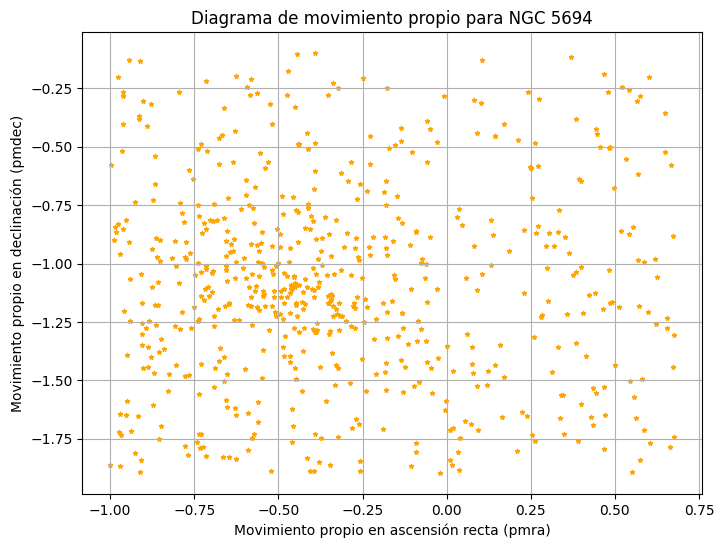

In [131]:
# Haga el gráfico en esta celda
plt.figure(figsize=(8, 6))
plt.scatter(pmra, pmdec, s = 9.5, alpha = 1, marker = '*', color = 'orange')
plt.xlabel('Movimiento propio en ascensión recta (pmra)')
plt.ylabel('Movimiento propio en declinación (pmdec)')
plt.title('Diagrama de movimiento propio para NGC 5694')
plt.grid(True)
plt.show()

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [132]:
mu_pmra = pmra.mean() # promedio pmra
std_pmra = pmra.std() # desviación estándar pmra
print('promedio y sigma pmra: ')
print(mu_pmra)
print(std_pmra)

mu_pmdec = pmdec.mean() # promedio pmdec
std_pmdec = pmdec.std() # desviación estándar pmdec
print('promedio y sigma pmdec: ')
print(mu_pmdec)
print(std_pmdec)

promedio y sigma pmra: 
-0.3123486977209311
0.43823620785185174
promedio y sigma pmdec: 
-1.0897362576861138
0.42760876013101434


Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [133]:
from scipy.stats import norm

# Distribución Gaussiana para pmra
# (Ascensión recta)
x_pmra = np.linspace(-1.5, 1, 300)
fx_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra)
print (fx_pmra)

# Distribución Gaussiana para pmra
# (Declinación)
x_pmdec = np.linspace(-2.5, 0.5, 300)
fx_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec)
print (fx_pmdec)

[0.0231402  0.02436372 0.0256426  0.0269788  0.02837428 0.02983109
 0.03135128 0.03293695 0.03459022 0.03631326 0.03810825 0.03997741
 0.04192299 0.04394726 0.0460525  0.04824103 0.05051517 0.05287726
 0.05532966 0.05787473 0.06051484 0.06325235 0.06608964 0.06902906
 0.07207299 0.07522374 0.07848367 0.08185506 0.08534021 0.08894136
 0.09266074 0.09650052 0.10046284 0.10454979 0.1087634  0.11310565
 0.11757845 0.12218365 0.126923   0.13179821 0.13681086 0.14196248
 0.14725446 0.15268813 0.15826467 0.16398519 0.16985063 0.17586183
 0.18201951 0.18832423 0.19477642 0.20137635 0.20812414 0.21501975
 0.22206298 0.22925346 0.23659062 0.24407374 0.25170191 0.25947402
 0.26738876 0.27544464 0.28363996 0.29197281 0.30044108 0.30904245
 0.31777437 0.32663408 0.33561862 0.34472478 0.35394914 0.36328807
 0.3727377  0.38229394 0.39195249 0.40170879 0.41155811 0.42149545
 0.43151563 0.44161324 0.45178265 0.46201802 0.47231333 0.48266231
 0.49305855 0.50349539 0.51396603 0.52446348 0.53498054 0.5455

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

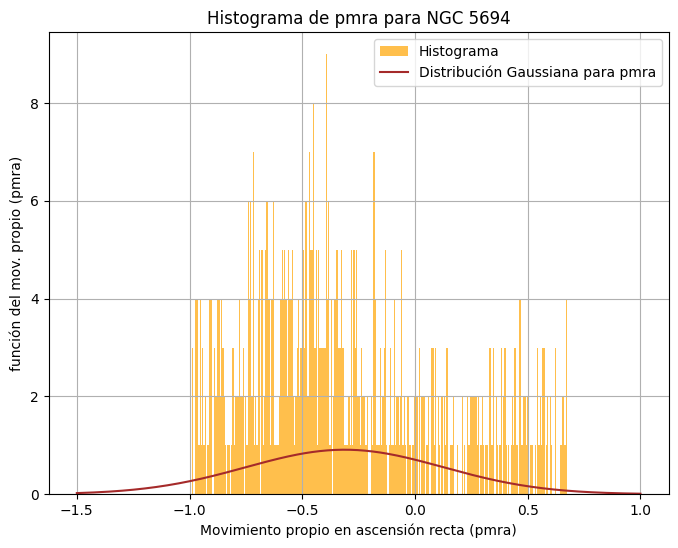

In [134]:
# Histograma para pmra
plt.figure(figsize=(8, 6))
plt.hist(pmra, bins = 300, color = 'orange', alpha = 0.7, label = 'Histograma')
#se utiliza bins = 300 considerando que el arreglo es de 300 números.
plt.plot(x_pmra, fx_pmra, color = 'brown', label = 'Distribución Gaussiana para pmra')
plt.xlabel('Movimiento propio en ascensión recta (pmra)')
plt.ylabel('función del mov. propio (pmra)')
plt.title('Histograma de pmra para NGC 5694')
plt.grid(True)
plt.legend()
plt.show()



Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

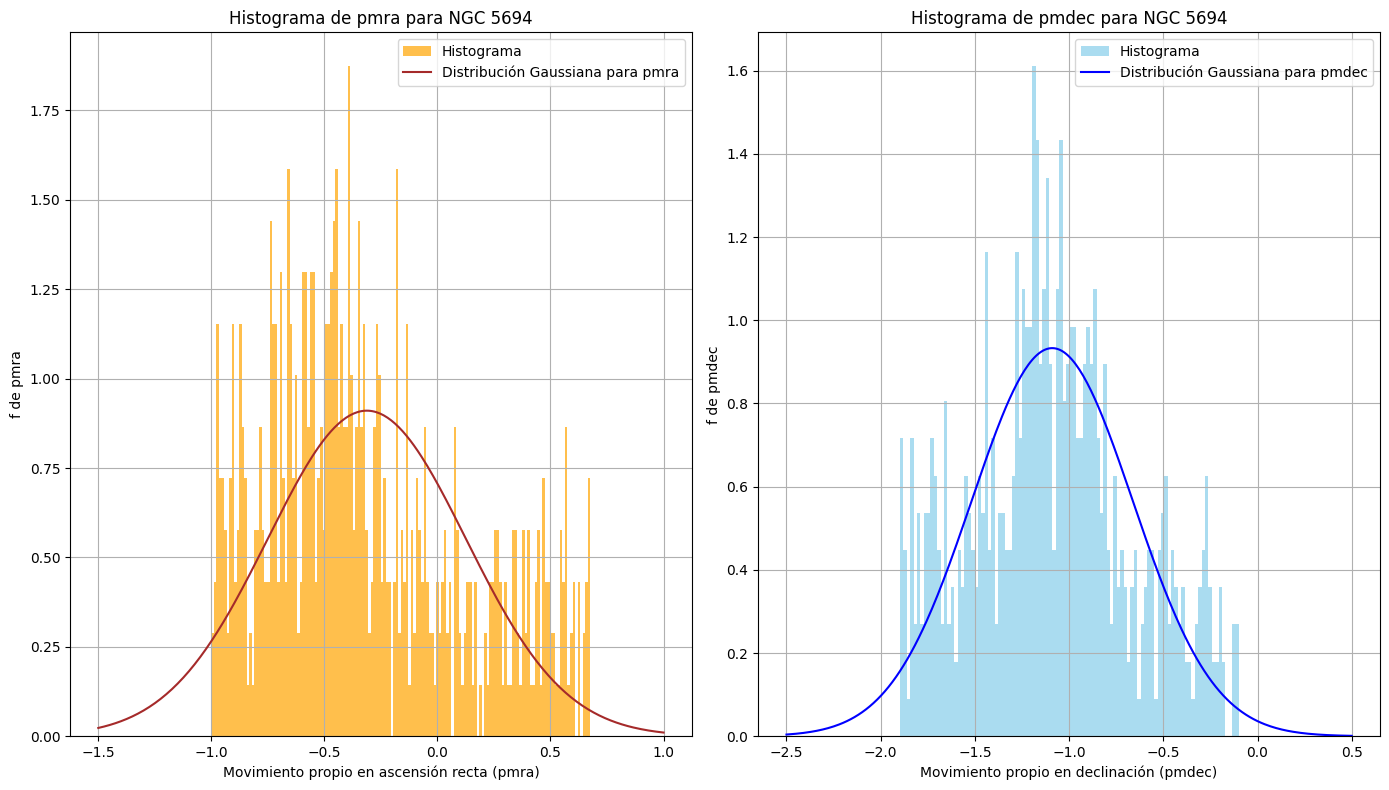

In [135]:
# Histogramas para pmra y pmdec:
plt.figure(figsize=(14, 8))

# para pmra:
plt.subplot(1, 2, 1)
plt.hist(pmra, bins = 150, density = True, color = 'orange', alpha = 0.7, label = 'Histograma')
plt.plot(x_pmra, fx_pmra, color='brown', label='Distribución Gaussiana para pmra')
plt.xlabel('Movimiento propio en ascensión recta (pmra)')
plt.ylabel('f de pmra')
plt.title('Histograma de pmra para NGC 5694')
plt.grid(True)
plt.legend()

# para pmdec:
plt.subplot(1, 2, 2)
plt.hist(pmdec, bins = 100, density = True, color = 'skyblue', alpha = 0.7, label = 'Histograma')
plt.plot(x_pmdec, fx_pmdec, color='blue', label='Distribución Gaussiana para pmdec')
plt.xlabel('Movimiento propio en declinación (pmdec)')
plt.ylabel('f de pmdec')
plt.title('Histograma de pmdec para NGC 5694')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#se cambia bins de 300 a 100 en este caso para poder apreciar de mejor manera la diferencia entre los histogramas de pmra y pmdec
#se puede apreciar más fácilmente el desplazamiento de la Gaussiana

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

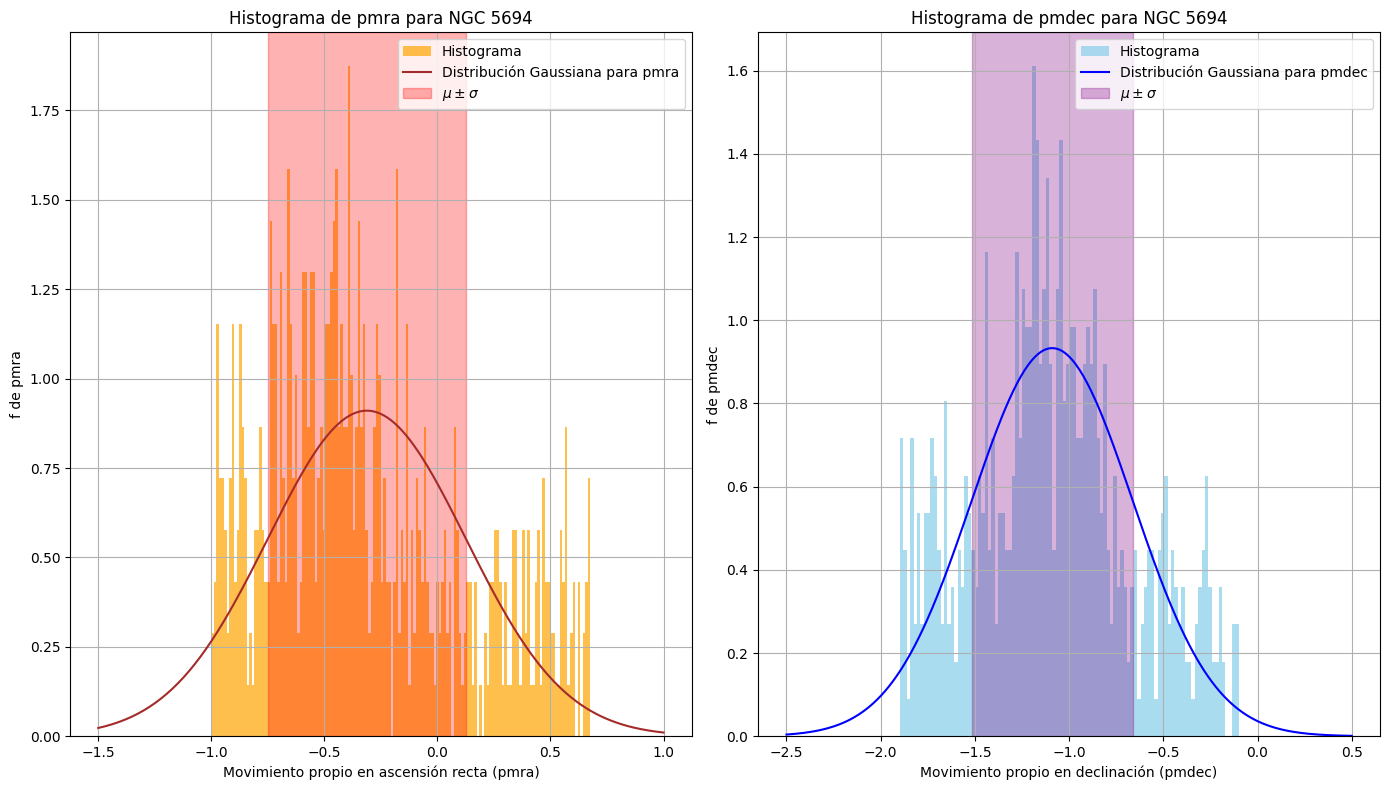

In [136]:
# Histogramas para pmra y pmdec
plt.figure(figsize=(14, 8))

# para pmra:
plt.subplot(1, 2, 1)
plt.hist(pmra, bins = 150, density = True, color = 'orange', alpha = 0.7, label = 'Histograma')
plt.plot(x_pmra, fx_pmra, color='brown', label='Distribución Gaussiana para pmra')
# utilización de plt.axvspan()
plt.axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color='red', alpha=0.3, label='$\mu \pm \sigma$')
plt.xlabel('Movimiento propio en ascensión recta (pmra)')
plt.ylabel('f de pmra')
plt.title('Histograma de pmra para NGC 5694')
plt.grid(True)
plt.legend()

# para pmdec:
plt.subplot(1, 2, 2)
plt.hist(pmdec, bins = 100, density = True, color = 'skyblue', alpha = 0.7, label = 'Histograma')
plt.plot(x_pmdec, fx_pmdec, color='blue', label='Distribución Gaussiana para pmdec')
# utilización de plt.axvspan()
plt.axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color='purple', alpha=0.3, label='$\mu \pm \sigma$')
plt.xlabel('Movimiento propio en declinación (pmdec)')
plt.ylabel('f de pmdec')
plt.title('Histograma de pmdec para NGC 5694')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#se cambia bins de 300 a 100 en este caso para poder apreciar de mejor manera la diferencia entre los histogramas de pmra y pmdec
#se puede apreciar más fácilmente el desplazamiento de la Gaussiana

Según las gaussianas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** Considerando la distribución Gaussiana de pmra y pmdec, es posible observar que las estimaciones para pmra y pmdec son:
pmra ~ (-0.25)
pmdec ~ (-1.0)
Es decir, la moyr parte de los datos se agrupan alrededor de estos valores, respectivamente. Además, la Gaussiana para pmdec es más delgada que la Gausiada para pmra. (Espero haber entendido correctamente la pregunta)

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [137]:
# Lea y muestre el DataFrame aquí
path_archivo = '/content/drive/MyDrive/FCFM - Universidad de Chile/Módulo Astro y ciencia de datos/data_spectra.csv'
data = pd.read_csv(path_archivo)
data

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,0.693123,1.222298,1.249391,1.105946,1.374470,0.780127,1.094418,1.061418,...,1.350584,0.760689,1.397787,0.627549,0.698279,0.815585,0.813801,1.079114,0.652794,0.897564
1416,1416,15624.911694,1.387281,1.332809,1.151107,1.254744,1.331042,0.979532,0.881491,1.209496,...,1.177786,0.711269,1.098026,0.829656,1.314102,1.167825,1.275656,0.947942,0.827006,1.365960
1417,1417,15626.134683,1.208096,0.914692,0.874394,1.083929,1.352754,0.606663,0.657862,1.055156,...,0.656540,0.970074,0.997054,1.222855,0.970080,1.306091,1.173684,0.832711,1.381874,1.149033
1418,1418,15627.357673,1.167845,1.261191,1.306496,0.945764,1.119779,0.892840,1.305614,0.618601,...,0.827102,0.619797,1.307590,0.979190,0.767770,1.170864,0.892064,1.355639,0.753463,1.000630


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** A simple vista se detectan 3 líneas de emisión. Una principal y más larga, y las otras dos (una a cada lado) más cortas. la tres se encuentran en el rango ~15200 a ~15300. La principal en ~15250

In [138]:
# Se seleccionan los datos de las columnas
# obs_1
# y se guardan en las variables:
obs_1 = data['obs_1'] #potencia asociada a las longitudes de onda
Wlth = data['Wlth'] #longitudes de onda

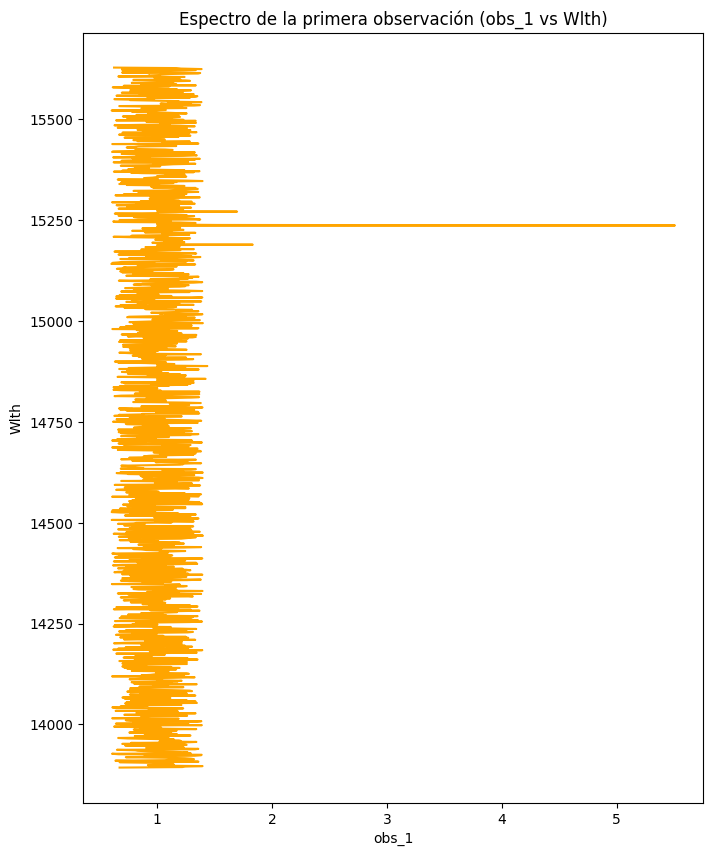

In [139]:
# Grafique aquí
plt.figure(figsize=(8, 10))
plt.plot(obs_1, Wlth, color = 'orange')
plt.xlabel('obs_1')
plt.ylabel('Wlth')
plt.title('Espectro de la primera observación (obs_1 vs Wlth)')
plt.show()

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Utilizando el promedio de observación, restarselo a los valores de las observaciones, de forma de generar un desplazamiento:

1.0116525979427404
0      -0.338588
1       0.206785
2       0.232843
3       0.383761
4       0.001879
          ...   
1415   -0.318530
1416    0.375628
1417    0.196444
1418    0.156192
1419   -0.386687
Name: obs_1, Length: 1420, dtype: float64


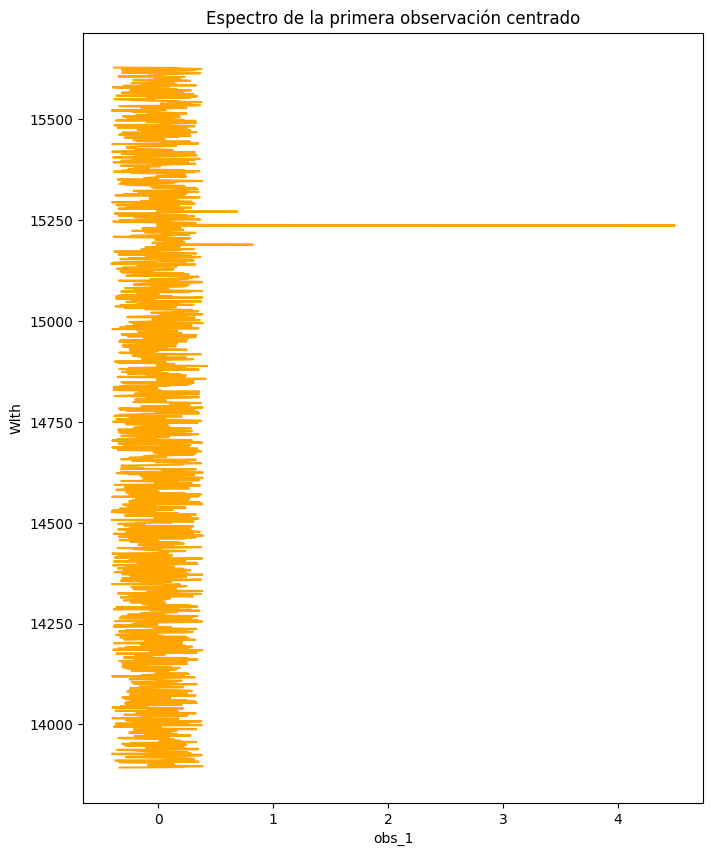

In [140]:
# Grafique el espectro centrado en 0 aquí
v_medio = obs_1.mean()
print (v_medio)
obs_1c = obs_1 - v_medio
obs_1c
print (obs_1c)

#Grafico
plt.figure(figsize=(8, 10))
plt.plot(obs_1c, Wlth, color = 'orange')
plt.title('Espectro de la primera observación centrado')
plt.xlabel('obs_1')
plt.ylabel('Wlth')
plt.show()


### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [141]:
sigma = obs_1.std() # desviación estándar
ruido = obs_1[(obs_1 >= obs_1.mean() - 3*sigma) & (obs_1 <= obs_1.mean() + 3*sigma)]
ruido_mn = ruido.mean() # media ruido
print (ruido)

0       0.673065
1       1.218438
2       1.244496
3       1.395414
4       1.013531
          ...   
1415    0.693123
1416    1.387281
1417    1.208096
1418    1.167845
1419    0.624966
Name: obs_1, Length: 1418, dtype: float64


2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

0      -0.334837
1       0.210536
2       0.236594
3       0.387512
4       0.005629
          ...   
1415   -0.314779
1416    0.379379
1417    0.200194
1418    0.159943
1419   -0.382936
Name: obs_1, Length: 1420, dtype: float64


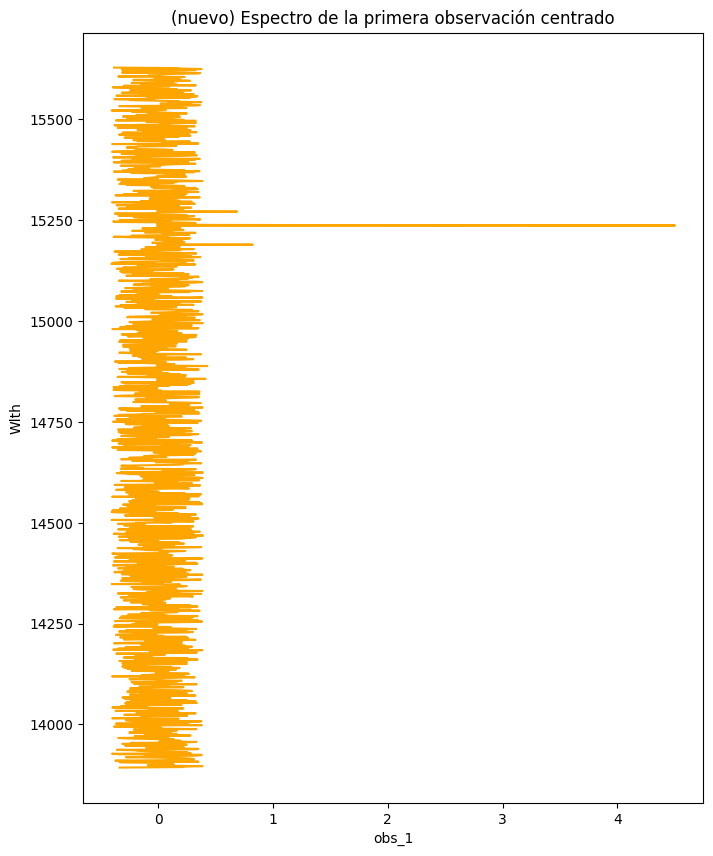

In [142]:
# Grafique el espectro centrado en 0 aquí
obs_1cn = obs_1 - ruido.mean()
print (obs_1cn)


# Grafico
# se grafica obs_1 vs Wlth, esta vez sin el ruido.
# el ruido fue calculado considerando la desviación estándar de obs_1
# con un margen de +- 3sigma
plt.figure(figsize=(8, 10))
plt.plot(obs_1cn, Wlth, color = 'orange')
plt.title('(nuevo) Espectro de la primera observación centrado')
plt.xlabel('obs_1')
plt.ylabel('Wlth')
plt.show()

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** Se utiliza un valor de $n$ = 2000, esto principalmente se escogió a través de un tanteo de posibles $n$. Con este valor esposible obtener un buen gráfico para analizar.

In [143]:
sigma_ruido = ruido.std() # desviaicón estándar
print (sigma_ruido)


0.22495875092219347


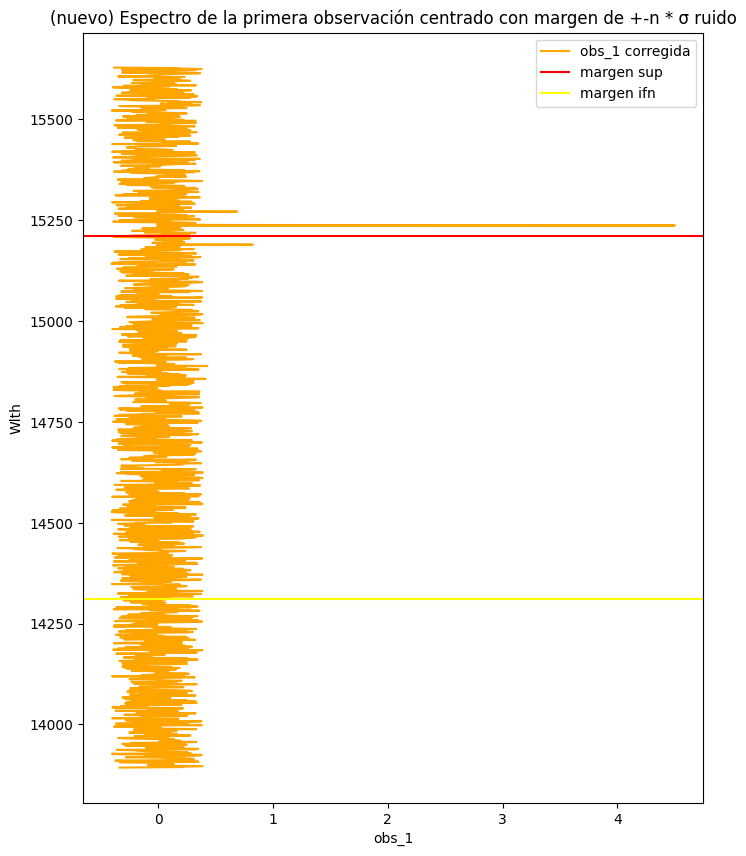

In [144]:
# n debe ser conveniente
n = 2000
# Grafico
plt.figure(figsize=(8, 10))
plt.plot(obs_1cn, Wlth, color = 'orange', label  = 'obs_1 corregida')
plt.axhline(y = Wlth.mean() + n*sigma_ruido, color = 'red', linestyle = '-', label = 'margen sup')
plt.axhline(y = Wlth.mean() - n*sigma_ruido, color = 'yellow', linestyle = '-', label = 'margen ifn')
plt.title('(nuevo) Espectro de la primera observación centrado con margen de +-n * σ ruido')
plt.xlabel('obs_1')
plt.ylabel('Wlth')
plt.legend()
plt.show()


### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [145]:
for columna in data.columns:
  if columna.startswith('obs_'):
    # Centra la observación en 0 restando la media del ruido
    ruido_columna = data[columna][(data[columna] >= data[columna].mean() - 3 * data[columna].std()) & (data[columna] <= data[columna].mean() + 3 * data[columna].std())]
    data[columna] = data[columna] - ruido_columna.mean()
data


,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,-0.334837,0.048739,0.133701,0.362853,0.201410,-0.223720,-0.217798,-0.285839,...,-0.155063,-0.161301,-0.041081,-0.098143,-0.267710,-0.110412,-0.229588,0.213125,-0.052771,-0.284948
1,1,13894.381791,0.210536,0.384755,-0.354463,0.283881,0.219970,0.294341,0.294168,-0.030236,...,-0.214035,-0.196423,0.109355,0.236468,-0.246610,-0.064916,0.025866,0.120696,0.389733,-0.204204
2,2,13895.604780,0.236594,-0.224127,0.210778,-0.104288,0.199370,0.129416,0.138232,-0.364276,...,0.214896,0.092456,-0.134420,0.237607,-0.073721,-0.049146,0.281783,-0.384137,0.125374,0.004951
3,3,13896.827769,0.387512,-0.147004,-0.072299,-0.385685,0.097323,0.362443,-0.184435,-0.107535,...,-0.159208,0.210652,0.190932,0.055096,-0.273209,0.231390,0.374388,-0.223269,-0.194508,-0.283408
4,4,13898.050759,0.005629,-0.108552,0.123400,0.351261,-0.322103,-0.032836,-0.364873,0.290442,...,-0.394844,-0.282750,-0.309487,0.029362,0.158728,0.082569,0.393471,-0.209000,-0.128977,-0.294620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,-0.314779,0.222278,0.247164,0.103127,0.370664,-0.221073,0.099183,0.052125,...,0.343675,-0.228679,0.391967,-0.364783,-0.303944,-0.183150,-0.180568,0.078666,-0.352263,-0.101966
1416,1416,15624.911694,0.379379,0.332789,0.148880,0.251925,0.327237,-0.021668,-0.113744,0.200203,...,0.170877,-0.278099,0.092207,-0.162676,0.311879,0.169090,0.281288,-0.052506,-0.178051,0.366430
1417,1417,15626.134683,0.200194,-0.085328,-0.127833,0.081110,0.348949,-0.394537,-0.337372,0.045863,...,-0.350369,-0.019294,-0.008765,0.230524,-0.032143,0.307356,0.179316,-0.167737,0.376817,0.149503
1418,1418,15627.357673,0.159943,0.261171,0.304269,-0.057055,0.115973,-0.108359,0.310380,-0.390692,...,-0.179807,-0.369570,0.301771,-0.013142,-0.234453,0.172129,-0.102305,0.355191,-0.251594,0.001100


2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [146]:
sigmas = [] # almacenamiento de desviación estándar
promedios = []  # almacenamiento promedios
num_obs = 20  # total de observaciones

# Calculo sigma y promedio obs_1
sigma_obs1 = data['obs_1'].std()
promedio_obs1 = data['obs_1'].mean()
sigmas.append(sigma_obs1)
promedios.append(promedio_obs1)

# Promedio de observaciones y calculo  de sigmas:
obs_promedio_acumulado = data['obs_1'].copy()
for i in range(2, num_obs + 1):
  obs_nm = 'obs_' + str(i)

  # se actualiza el promedio acumulado correctamente
  obs_promedio_acumulado += data[obs_nm]
  promedio_actual = obs_promedio_acumulado / i
  promedios.append(promedio_actual)

  # calculo de la desviación estándar del promedio actual
  sigma_promedio = promedio_actual.std()
  sigmas.append(sigma_promedio)

# se añade la columna obs_all al DataFrame
data['obs_all'] = obs_promedio_acumulado / num_obs

# resultados
for i, (promedio, sigma) in enumerate(zip(promedios, sigmas)):
  print("Promedio de ", i+1, "observaciones:", promedio.mean())
  print("Sigma de", i+1, "observaciones:", sigma)

# se añaden más comentarios para facilitar el entendimiento del código

Promedio de  1 observaciones: 0.003750617230219963
Sigma de 1 observaciones: 0.25549698527356973
Promedio de  2 observaciones: 0.0038104875665233725
Sigma de 2 observaciones: 0.19803768628979346
Promedio de  3 observaciones: 0.003790149778421197
Sigma de 3 observaciones: 0.1709687216249224
Promedio de  4 observaciones: 0.0036714147657134284
Sigma de 4 observaciones: 0.15772538831754362
Promedio de  5 observaciones: 0.0035815517172415076
Sigma de 5 observaciones: 0.14848188156633857
Promedio de  6 observaciones: 0.0035504682337030406
Sigma de 6 observaciones: 0.14056321107939018
Promedio de  7 observaciones: 0.003553224785981869
Sigma de 7 observaciones: 0.13777978975574795
Promedio de  8 observaciones: 0.0035552653942501227
Sigma de 8 observaciones: 0.13298385994174516
Promedio de  9 observaciones: 0.00356085474822465
Sigma de 9 observaciones: 0.12915587062654124
Promedio de  10 observaciones: 0.0035437036214488794
Sigma de 10 observaciones: 0.1261046681431102
Promedio de  11 observaci

 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:** La desviación estándar $σ$ decrece. Este es un resultado esperado, considerando que se van promediando y analizando más observaciones, por ello, se deben obtener resultados más cercanos, de forma que $σ$ decrezca.

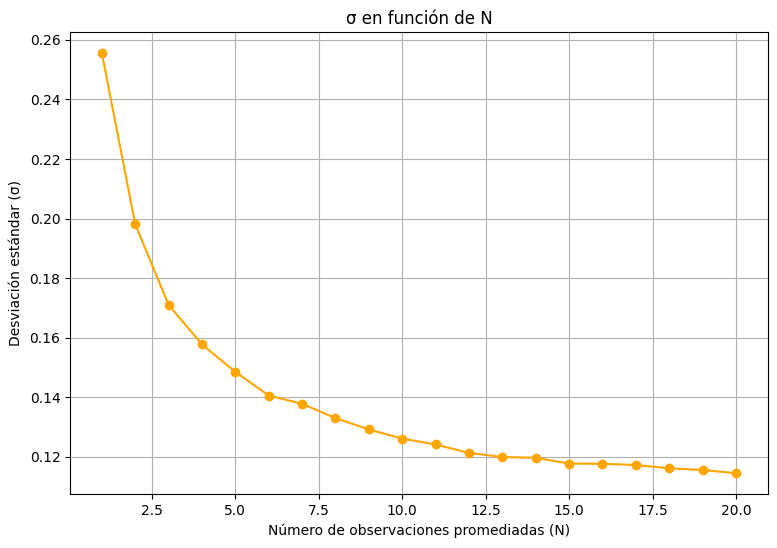

In [147]:
# Grafico de N vs sigma
N = np.arange(1, num_obs + 1)
plt.figure(figsize=(9, 6))
plt.plot(N, sigmas, marker='o', linestyle='-', color = 'orange')
plt.xlabel('Número de observaciones promediadas (N)')
plt.ylabel('Desviación estándar (σ)')
plt.title('σ en función de N')
plt.grid(True)
plt.show()


### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** En este último gráfico se observan 5 líneas de emisión. La verdad no sabría explicar por qué. Por lo que supongo, tiene que ver con las desviaicones estándares ($σ$) que se calcularon.

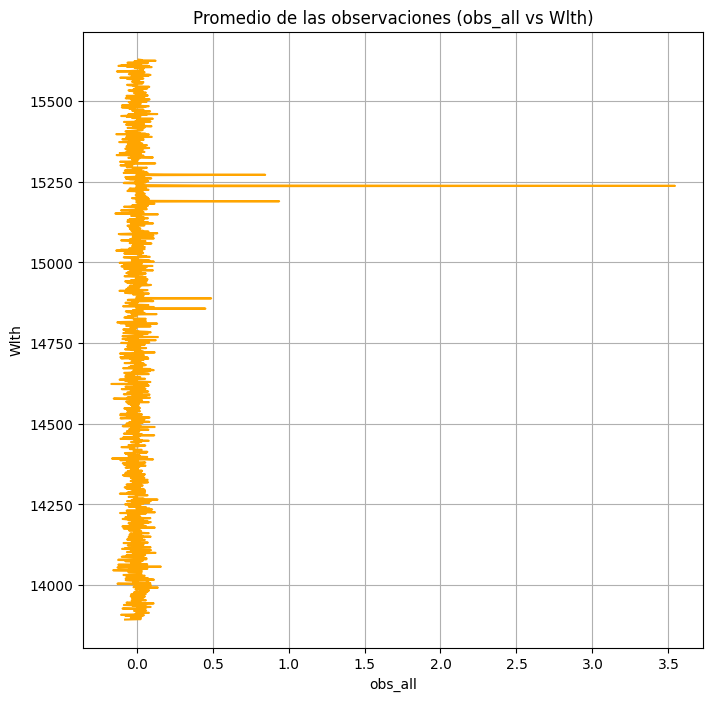

In [148]:
# Gráfico de obs_all vs Wlth
obs_all = data['obs_all']
plt.figure(figsize = (8, 8))
plt.plot(obs_all, Wlth, color = 'orange')
plt.xlabel('obs_all')
plt.ylabel('Wlth')
plt.title('Promedio de las observaciones (obs_all vs Wlth)')
plt.grid(True)
plt.show()